## Based on the Kaggle notebook: https://www.kaggle.com/someadityamandal/bitcoin-time-series-forecasting

## Some lybraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import csv


In [2]:
!pip install chart_studio

In [3]:
import matplotlib.pyplot as plt

from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns


## Importing data

In [4]:
data = pd.read_csv('../data_extraction/full_data_eth_13072020.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 13, 2020",242.18,244.31,238.23,239.60,"7,787,751,468","26,775,071,858"
1,"Jul 12, 2020",239.46,243.31,237.77,242.13,"6,596,394,718","27,054,158,346"
2,"Jul 11, 2020",241.04,241.53,238.33,239.46,"5,643,067,316","26,752,161,985"
3,"Jul 10, 2020",242.87,242.88,236.73,240.98,"7,281,370,522","26,919,422,187"
4,"Jul 09, 2020",246.75,247.29,239.90,243.02,"8,429,099,199","27,143,016,879"


In [5]:
data.dtypes

Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

## Function to change object to numerical data

In [6]:
def obj_to_num(df,cols):
    def obj_to_num(row):
        row = row.replace(',','')
        return float(row)

    for col in cols: 
        df[col] = df[col].apply(obj_to_num) 
    return df

In [7]:
columns = ['Open','High','Low','Close','Volume','Market Cap']
num_data = obj_to_num(data,columns)
num_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 13, 2020",242.18,244.31,238.23,239.60,7.787751e+09,2.677507e+10
1,"Jul 12, 2020",239.46,243.31,237.77,242.13,6.596395e+09,2.705416e+10
2,"Jul 11, 2020",241.04,241.53,238.33,239.46,5.643067e+09,2.675216e+10
3,"Jul 10, 2020",242.87,242.88,236.73,240.98,7.281371e+09,2.691942e+10
4,"Jul 09, 2020",246.75,247.29,239.90,243.02,8.429099e+09,2.714302e+10


In [8]:
from datetime import datetime
num_data['Date'] = num_data['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))
num_data['Date'] = pd.to_datetime(num_data['Date'], utc=True)
num_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-07-13 00:00:00+00:00,242.18,244.31,238.23,239.60,7.787751e+09,2.677507e+10
1,2020-07-12 00:00:00+00:00,239.46,243.31,237.77,242.13,6.596395e+09,2.705416e+10
2,2020-07-11 00:00:00+00:00,241.04,241.53,238.33,239.46,5.643067e+09,2.675216e+10
3,2020-07-10 00:00:00+00:00,242.87,242.88,236.73,240.98,7.281371e+09,2.691942e+10
4,2020-07-09 00:00:00+00:00,246.75,247.29,239.90,243.02,8.429099e+09,2.714302e+10


In [9]:
num_data.dtypes

Date          datetime64[ns, UTC]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Market Cap                float64
dtype: object

## Making data plot

In [10]:
!pip install pytz

In [11]:
# create valid date range
import pytz
start = datetime(2013, 3, 5, 0, 0, 0, 0, pytz.UTC)
end = datetime(2020, 6, 7, 0, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
weekly_rows = num_data[(num_data['Date'] >= start) & (num_data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
weekly_rows.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2015-08-10 00:00:00+00:00,0.713989,0.729854,0.636546,0.708448,405283.0,42818364.0
1,2015-08-17 00:00:00+00:00,1.580000,1.580000,1.190000,1.200000,1942830.0,87295367.0
2,2015-08-24 00:00:00+00:00,1.350000,1.360000,1.230000,1.230000,924920.0,89515257.0
3,2015-08-31 00:00:00+00:00,1.320000,1.400000,1.200000,1.360000,1447180.0,98963975.0
4,2015-09-07 00:00:00+00:00,1.300000,1.310000,1.240000,1.250000,489014.0,91020735.0


In [12]:
#import chart_studio.plotly as py
import plotly.graph_objects as go
import chart_studio as py

In [13]:
py.tools.set_credentials_file(username='ji_nb', api_key='eGoxXwU4vG6jV7WJVzpw')

In [14]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['High'].astype(float),
    mode = 'lines',
    name = 'High'
)

layout = dict(
    title='Historical ETH Prices (...-2020) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1, trace2, trace3]
fig = dict(data=data, layout=layout)
py.plotly.iplot(fig, filename = "Time_Series_with_Rangeslider")

In [18]:
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Volume'].astype(float),
    mode = 'lines',
    name = 'ETH Price (Open)'
)

layout = dict(
    title='Historical ETH Volume (USD) (...-2020)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
py.plotly.iplot(fig, filename = "Time Series with Rangeslider")

## Time series with XGBoost

In [16]:
!pip install dateparser

In [17]:
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import dateparser
plt.style.use('fivethirtyeight')

In [20]:
dateparse = lambda x: pd.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')
datat  = pd.read_csv('../data_extraction/full_data_eth_13072020.csv', parse_dates=[0], date_parser=dateparse)
datat['Date'] = datat['Date'].dt.tz_localize(None)
datat = datat.groupby([pd.Grouper(key='Date', freq='H')]).first().reset_index()
datat = datat.set_index('Date')
datat = datat[['Close']]
datat.dropna(subset=['Close'], inplace=True)
datat.head()

,Close
Date,
2015-08-07,2.77
2015-08-08,0.753325
2015-08-09,0.701897
2015-08-10,0.708448
2015-08-11,1.07


In [21]:
columns = ['Close']
datat = obj_to_num(datat,columns)   # Function to change object to numerical data

In [22]:
datat.dtypes

Close    float64
dtype: object

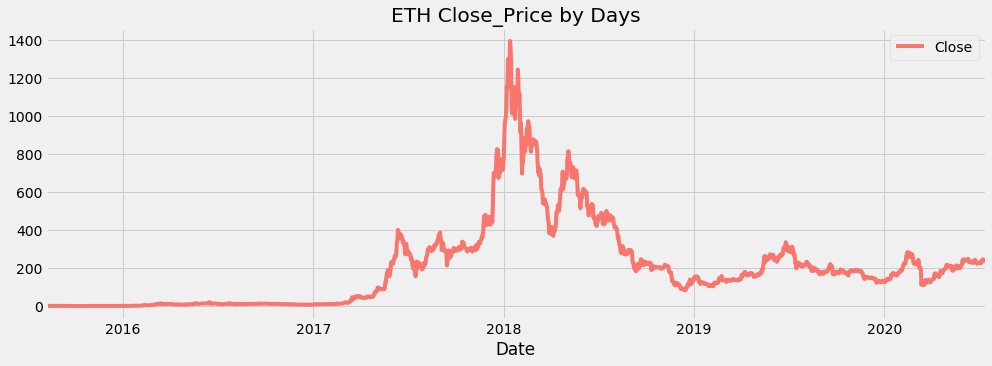

In [23]:
_ = datat.plot(style='', figsize=(15,5), color="#F8766D", title='ETH Close_Price by Days')

In [24]:
split_date = '2020-05-01'
data_train = datat.loc[datat.index <= split_date].copy()
data_test = datat.loc[datat.index > split_date].copy()

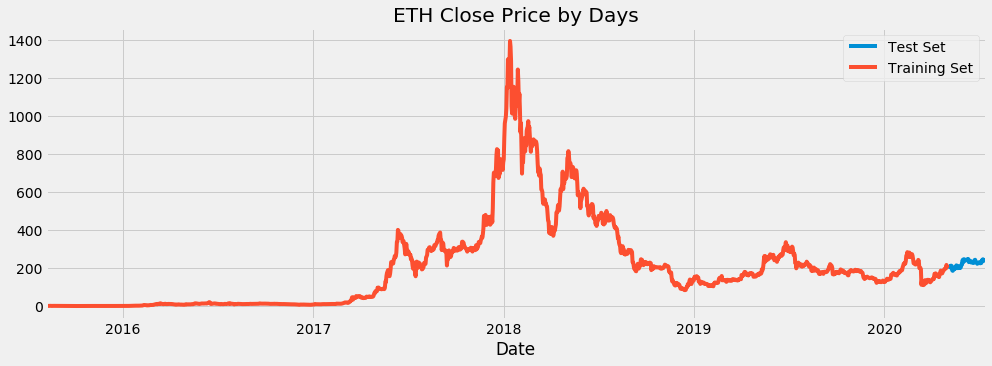

In [25]:
_ = data_test \
    .rename(columns={'Close': 'Test Set'}) \
    .join(data_train.rename(columns={'Close': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='ETH Close Price by Days', style='')

In [26]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [27]:
X_train, y_train = create_features(data_train, label='Close')
X_test, y_test = create_features(data_test, label='Close')

In [28]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[23:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [29]:
data_test['Close_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

In [30]:
final_data = datat.copy()
final_data = pd.merge(final_data, data_all, sort=False)
final_data = final_data.rename(columns={'Close_Prediction': 'xgboost'})
final_data = final_data[['Close','xgboost']]

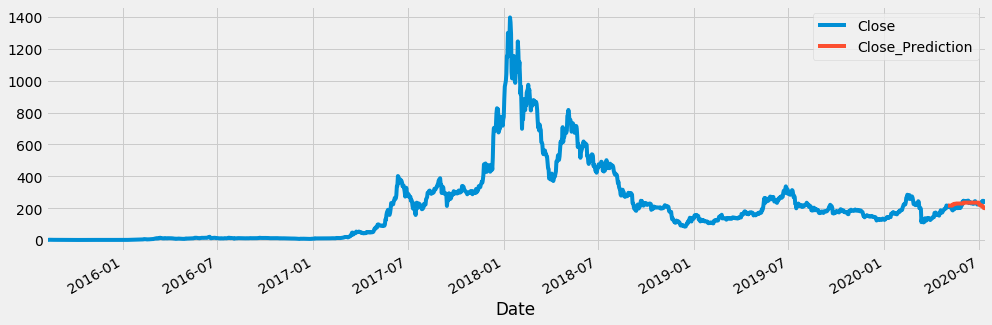

In [31]:
_ = data_all[['Close','Close_Prediction']].plot(figsize=(15, 5))

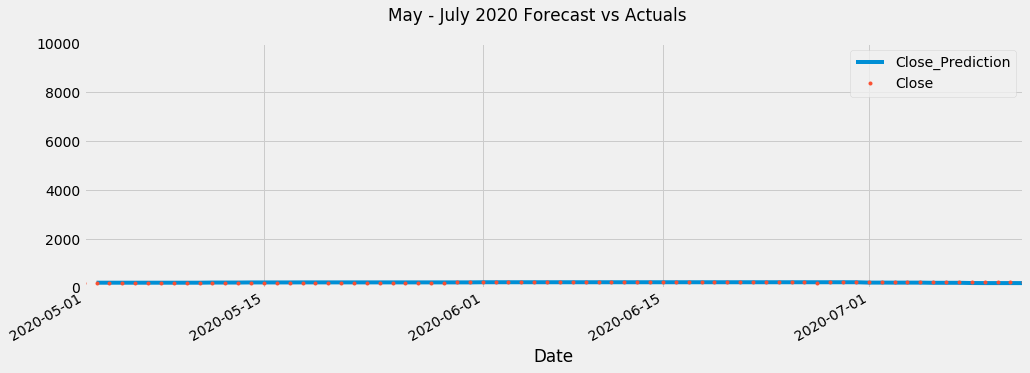

In [32]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Close_Prediction','Close']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2020-05-01', upper='2020-07-13')
ax.set_ylim(0, 10000)
plot = plt.suptitle('May - July 2020 Forecast vs Actuals')

In [33]:
mean_squared_error(y_true=data_test['Close'],
                   y_pred=data_test['Close_Prediction'])

345.72365371583584

In [34]:
mean_absolute_error(y_true=data_test['Close'],
                   y_pred=data_test['Close_Prediction'])

14.433350629414596

## Prophet model

In [ ]:
split_date2 = '2020-03-01'
data_train = data.loc[data.index <= split_date2].copy()
data_test = data.loc[data.index > split_date2].copy()

In [ ]:
# kata 
def rthn_between(a, b):
    lst = []

    if a == 0:
        a = 10

    for x in range(a,b+1):
      l = 1
      v = True
      while v:
        new_num = str(x)[:l] 
        s = sum([int(digit) for digit in new_num])
        if int(new_num)%s != 0:
          v = False
        elif int(new_num)%s == 0 and len(new_num) == len(str(x)):
          lst.append(x)
          v = False
        else:
          l += 1
    return lst


In [ ]:
# rthn_between(0, 999999)  #[9000004000000, 9000004000008]

In [ ]:
0**1

0